<a href="https://colab.research.google.com/github/gmazzitelli/GSN2/blob/master/budget.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import seaborn as sns
sns.set()
#plt.style.use('fast')
#plt.rc('font', size = 14, family ='Sans-Serif')
def panda_from_gspreadsheet(key, sheet_name='Sheet1', header=0):
  # google spredsheet TO panda dataframe 
  # ricordarsi di abilitare lo sharing pubblico dei dati
  url = 'https://docs.google.com/spreadsheets/d/{key}/gviz/tq?tqx=out:csv&sheet={sheet_name}&headers=1'.format(
      key=key, sheet_name=sheet_name.replace(' ', '%20'))
  return pd.read_csv(url, header=header)

#https://docs.google.com/spreadsheets/d/1MWRb1xbkpZOmUBLCLaC9ud4htvPEWYC7F8IuTt84YBg/edit?usp=sharing
#pd =  panda_from_gspreadsheet('1MWRb1xbkpZOmUBLCLaC9ud4htvPEWYC7F8IuTt84YBg', sheet_name='Sheet1')

def Exp(x, p0, p1): # negative exponential
  import numpy as np
  return p0*np.exp(x/p1)

def Line(x, m, q):
  import numpy as np
  return m*x + q
  
def Gain(x, p0, p1):
  import numpy as np
  return p0*x**p1

In [2]:
def sommatore_anno(pd_0):
    pd_0.fillna(0.0, inplace=True)
    #pd_0 = pd_0[1:]
    esperimenti = []
    missioni = []
    richieste = []
    totali = []
    dotazioni = False
    for i, esperimento in enumerate(pd_0.Esperimento):
        if not str(esperimento) in "nan" and i>0:
            # print(esperimento)
            if not dotazioni:
                esperimenti.append(esperimento)
                missioni.append(pd_0.MISS[i]+pd_0["Unnamed: 3"][i])
                richieste.append(pd_0.Rich[i])
                totali.append(pd_0.TOT[i])
            if dotazioni:
                if esperimento in esperimenti:
                    j = esperimenti.index(str(esperimento))
                    #print (esperimento, missioni[j], pd_0.MISS[i])
                    missioni[j] = missioni[j]+pd_0.MISS[i]+pd_0["Unnamed: 3"][i]
                    richieste[j] = richieste[j]+pd_0.Rich[i]
                    totali[j] = totali[j]+pd_0.TOT[i]
            if "Totale" in str(esperimento):
                dotazioni = True
                if "Esp. Dot." in str(esperimento):
                    esperimenti.append(esperimento)
                    missioni.append(pd_0.MISS[i]+pd_0["Unnamed: 3"][i])
                    richieste.append(pd_0.Rich[i])
                    totali.append(pd_0.TOT[i])
                if "Dotazioni" in str(esperimento):
                    esperimenti.append(esperimento)
                    missioni.append(pd_0.MISS[i]+pd_0["Unnamed: 3"][i])
                    richieste.append(pd_0.Rich[i])
                    totali.append(pd_0.TOT[i])
            if "Indiv." in str(esperimento):
                esperimenti.append(esperimento)
                missioni.append(pd_0.MISS[i]+pd_0["Unnamed: 3"][i])
                richieste.append(pd_0.Rich[i])
                totali.append(pd_0.TOT[i])

                    #print(pd_0.MISS[i], pd_0.Rich[i], pd_0.TOT[i])
    #print(len(esperimenti))
    missioni = np.array(missioni)
    richieste = np.array(richieste)
#    missioni[np.isnan(missioni)] = 0.0
#    richieste[np.isnan(richieste)] = 0.0
    return pd.DataFrame({'esperimenti':  esperimenti, 
                        'missioni': missioni, 
                        'richieste': richieste, 
                        'totali':totali})

In [3]:
pd_fte =  panda_from_gspreadsheet('1he_eLO8EHuBfw_g1MxEpTAo_DBNU0VrwiRhL8IASrAc', 
                              sheet_name='FTE24')
pd_fte

,sigla,FTE,persone
0,AMS2,36.06,65.0
1,ARCHIMEDES_2,7.23,20.0
2,AUGER,36.50,55.0
3,BULLKID_DM,6.55,20.0
4,CALC_TIER1_GR_2,NaN,NaN
5,COSINUS_CSN2,4.10,11.0
6,CRESST,2.70,6.0
7,CTA,56.60,110.0
8,CUORE_CUPID,44.20,88.0
9,CYGNO,11.20,25.0


In [4]:
pd_fte.loc[pd_fte.sigla == "EUCLID"].FTE.values[0]

29.5

In [29]:
budget =  panda_from_gspreadsheet('1he_eLO8EHuBfw_g1MxEpTAo_DBNU0VrwiRhL8IASrAc', 
                              sheet_name='BUDGET')
budget.fillna(0.0, inplace=True)
budget

,sigla,2022,2023,2024,2025,2026,2017,2018,2019,2020,commento,sito
0,AMS2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,budget n.d.,SPACE
1,ARCHIMEDES_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,budget n.d.,IT
2,AUGER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,budget n.d.,EXEU
3,BULLKID_DM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,budget n.d.,LNGS
4,CALC_TIER1_GR_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,budget n.d.,IT
5,COSINUS_CSN2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,budget n.d.,LNGS
6,CRESST,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,budget n.d.,LNGS
7,CTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,budget n.d.,EXEU
8,CUORE_CUPID,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,budget n.d.,LNGS
9,CYGNO,0.0,120.0,125.0,135.0,95.0,50.0,50.0,50.0,50.0,TDR 2022 (senza computing),LNGS


In [21]:
budget[budget.sito == 'LNGS'].sigla.values

array(['BULLKID_DM', 'COSINUS_CSN2', 'CRESST', 'CUORE_CUPID', 'CYGNO',
       'DAMA', 'DARKSIDE', 'GERDA', 'GINGER', 'NEWS', 'RESNOVA_CSN2',
       'SABRE', 'XENON'], dtype=object)

In [6]:
# test su pd_0
pd_0 =  panda_from_gspreadsheet('1he_eLO8EHuBfw_g1MxEpTAo_DBNU0VrwiRhL8IASrAc', 
                              sheet_name='2020')
sommatore_anno(pd_0)


,esperimenti,missioni,richieste,totali
0,AMS2,46.5,436.0,328.0
1,ARCHIMEDES_2,17.0,165.5,73.5
2,AUGER,24.0,910.5,513.0
3,BOREX,23.0,501.5,277.0
4,CALC-TIER1,2.0,356.0,2.0
5,COSINUS_CSN2,3.5,76.5,19.0
6,CRESST,1.5,156.5,48.0
7,CTA,48.5,1212.0,583.5
8,CUORE,15.0,208.5,27.0
9,CUPID,16.5,559.0,295.0


In [7]:
# crea il database totale
pd_anno = []
for anno in range(2016, 2025):
    pd_0 =  panda_from_gspreadsheet('1he_eLO8EHuBfw_g1MxEpTAo_DBNU0VrwiRhL8IASrAc', 
                              sheet_name=str(anno))
    print(anno)
    pd_anno.append([anno, sommatore_anno(pd_0)])

2016
2017
2018
2019
2020
2021
2022
2023
2024


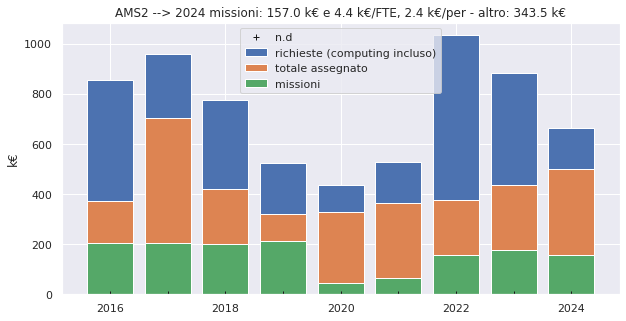

In [17]:
cerca = 'AMS2'
def plot_exp(cerca, pd_anno, pd_fte, budget):
    f = []
    a = []
    m = []
    r = []
    t = []
    b = []
    for i in range(len(pd_anno)):
        a.append(pd_anno[i][0])
        bval = 0
        if a[-1]>2021 and any(budget.sigla==cerca):
            bval = float(budget[budget.sigla == cerca][str(a[-1])].values[0])
        try:
            m.append(pd_anno[i][1][pd_anno[i][1].esperimenti==cerca].missioni.values[0])
            r.append(pd_anno[i][1][pd_anno[i][1].esperimenti==cerca].richieste.values[0])
            t.append(pd_anno[i][1][pd_anno[i][1].esperimenti==cerca].totali.values[0])
            # print (a[-1])
            if bval:
                b.append(bval)
            else:
                b.append(0)
        except:
            m.append(0)
            r.append(0)
            t.append(0)
            b.append(0)
    fig, ax = plt.subplots(figsize=(10,5))
    ax.bar(a, r ,  label="richieste (computing incluso)")
    ax.bar(a, t ,  label="totale assegnato")
    ax.bar(a, m ,  label="missioni")
    if any(budget.sigla==cerca):
        ax.plot(a, b , 'k+', label=budget[budget.sigla == cerca].commento.values[0])
    ax.set_ylabel('k€')
    if m[-1] and not (("Fondo" in cerca) or ("Totale" in cerca)):
        f.append(m[-1]/pd_fte.loc[pd_fte.sigla == cerca].FTE.values[0])
        title = "{:s} --> {:d} missioni: {:.1f} k€ e {:.1f} k€/FTE, {:.1f} k€/per - altro: {:.1f} k€"\
                .format(cerca, a[-1], m[-1],
                m[-1]/pd_fte.loc[pd_fte.sigla == cerca].FTE.values[0],
                m[-1]/pd_fte.loc[pd_fte.sigla == cerca].persone.values[0],
                t[-1]-m[-1])
    else:
        title = "{:s}".format(cerca)
        f.append(0)
    plt.title(title)
    plt.legend()
    plt.show()
plot_exp(cerca, pd_anno, pd_fte, budget)

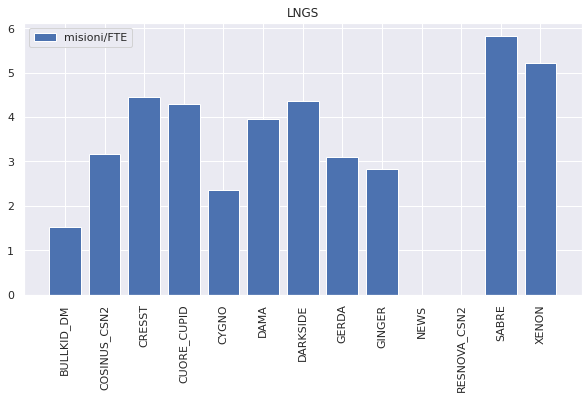

In [32]:
sito = 'LNGS'
def plot_site(sito, pd_anno, pd_fte, budget):
    e = []
    m = []
    for i, esp in enumerate(budget[budget.sito == sito].sigla.values):
        e.append(esp)
        try:
            m.append(pd_anno[-1][1][pd_anno[-1][1].esperimenti==esp].missioni.values[0]\
                 /pd_fte.loc[pd_fte.sigla == esp].FTE.values[0])
        except:
            m.append(0)
    fig, ax = plt.subplots(figsize=(10,5))
    ax.bar(e, m ,  label="misioni/FTE")
    plt.title("{:s}".format(sito))
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()
plot_site(sito, pd_anno, pd_fte, budget)

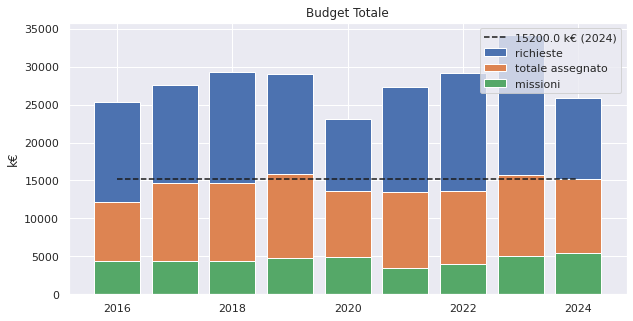

In [13]:
a = []
m = []
r = []
t = []
for i in range(len(pd_anno)):
    a.append(pd_anno[i][0])
    m.append(np.sum(pd_anno[i][1].missioni[-4:]))
    r.append(np.sum(pd_anno[i][1].richieste[-4:]))
    t.append(np.sum(pd_anno[i][1].totali[-4:]))
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(a, r ,  label="richieste")
ax.bar(a, t ,  label="totale assegnato")
ax.bar(a, m ,  label="missioni")
ax.hlines(y=15200.0	, xmin=pd_anno[0][0], xmax=pd_anno[i][0],
          color='k', linestyle='--', label='15200.0 k€ (2024)')
ax.set_ylabel('k€')
plt.title("Budget Totale")
plt.legend()
plt.show()

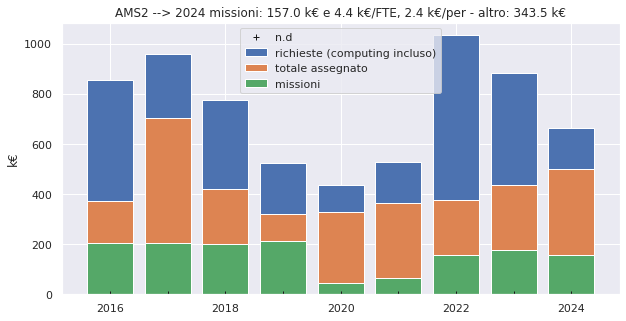

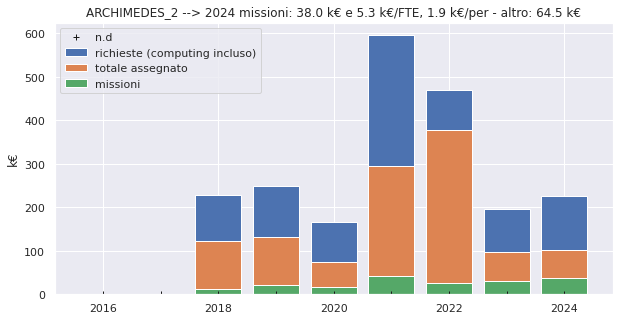

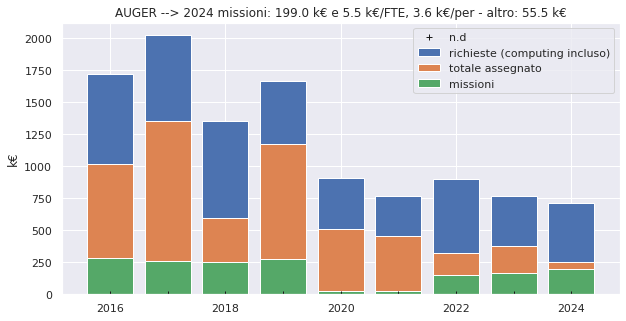

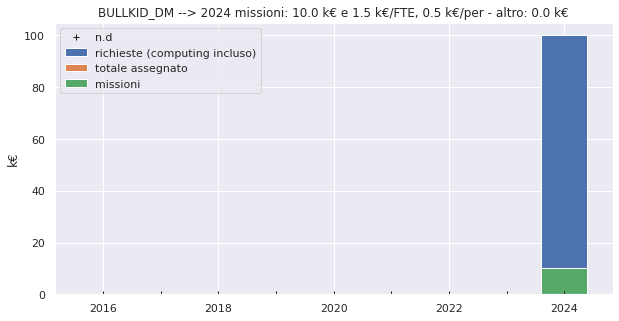

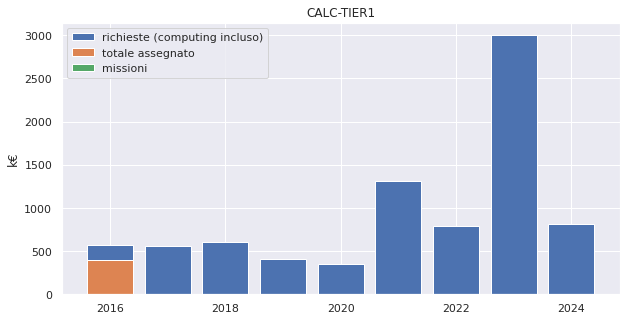

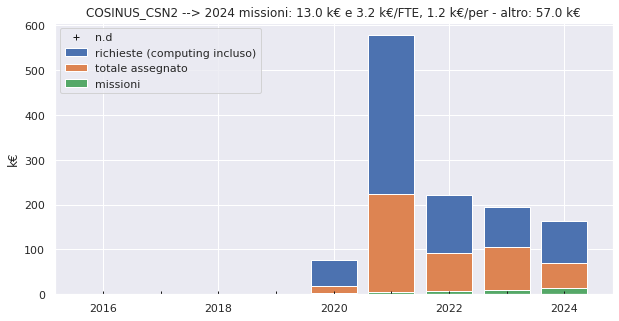

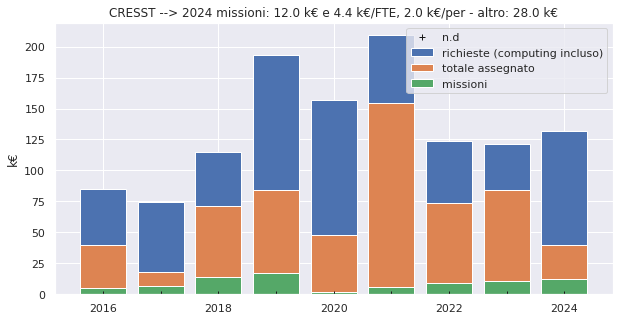

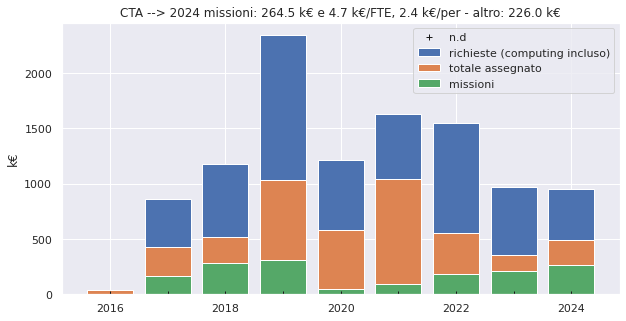

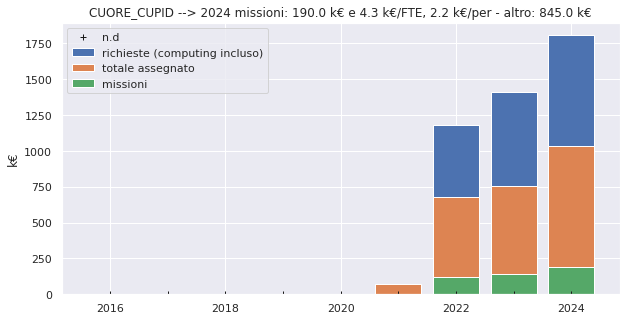

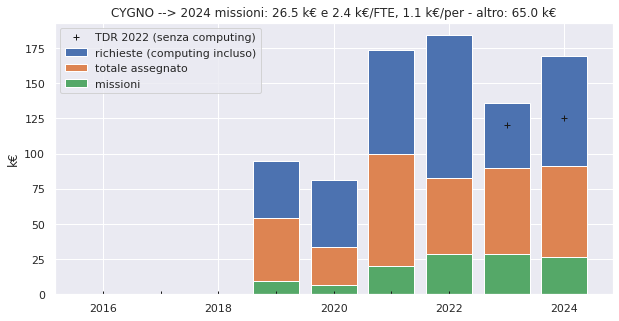

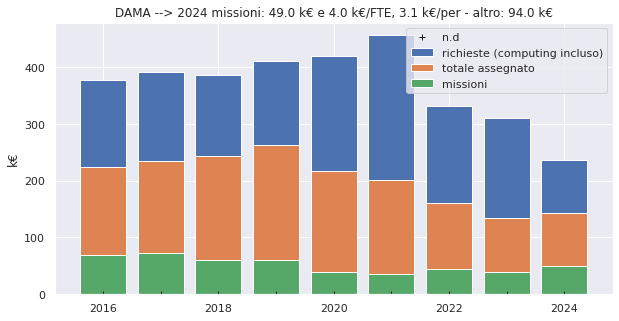

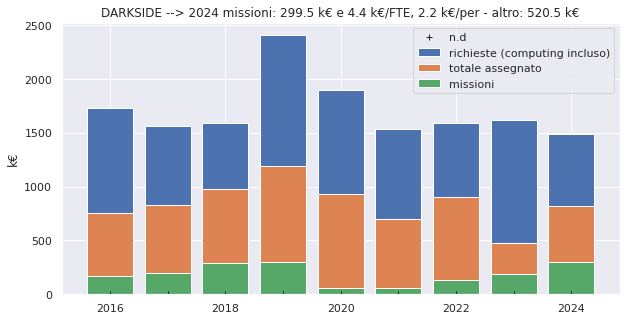

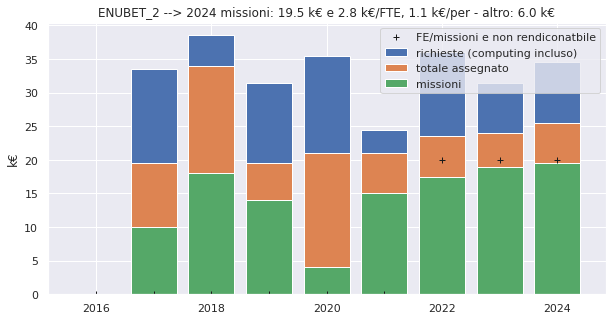

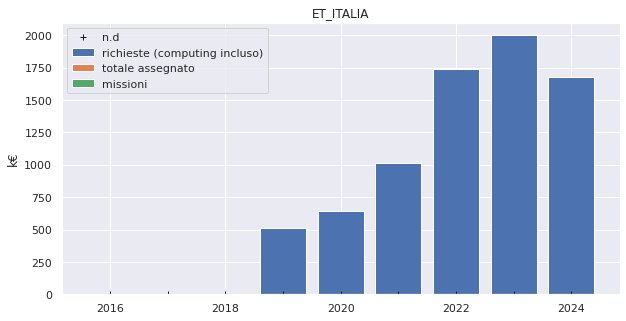

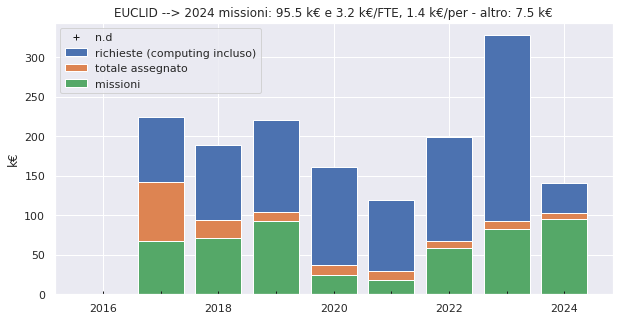

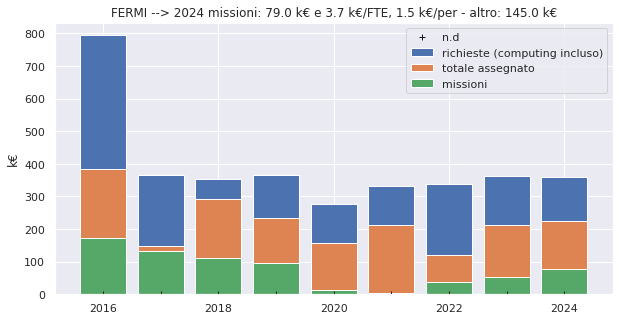

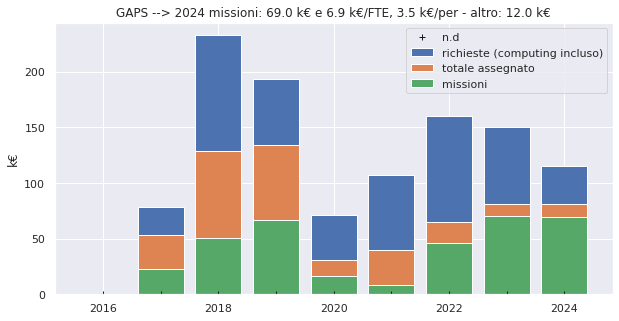

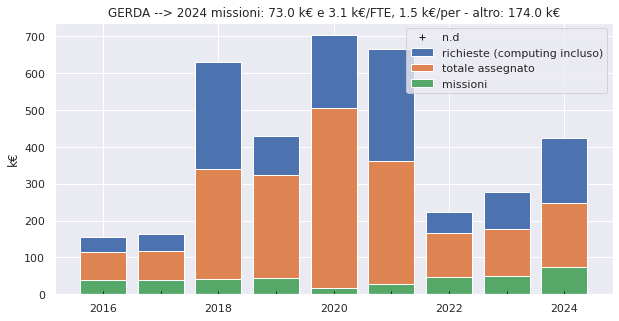

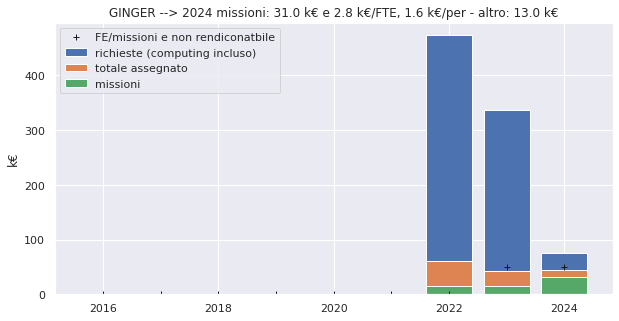

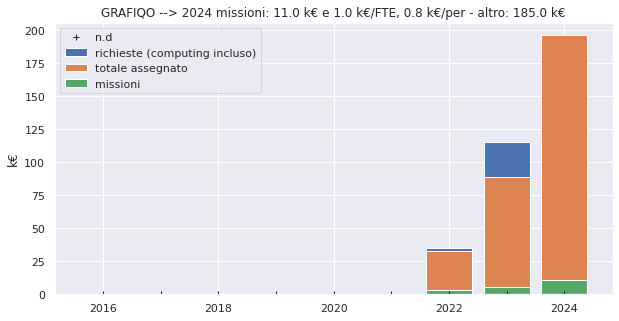

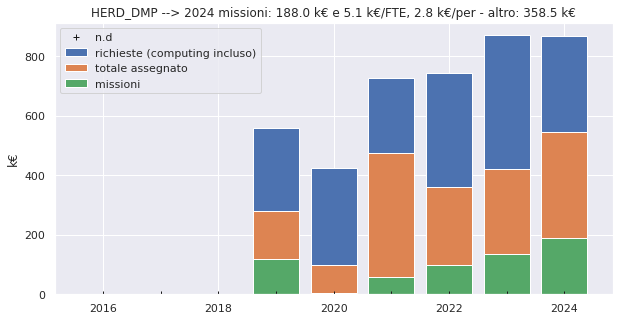

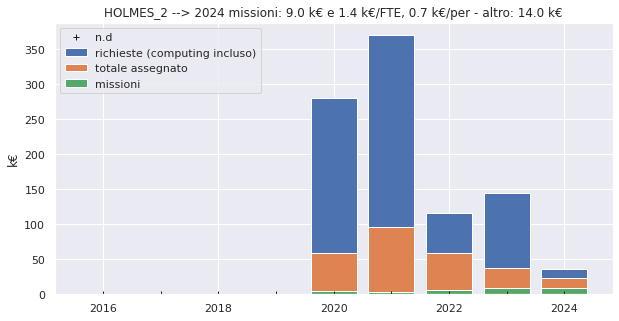

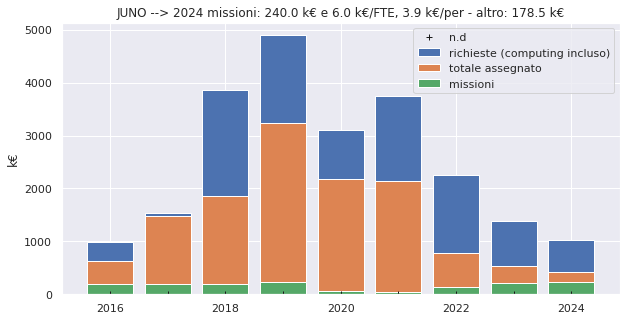

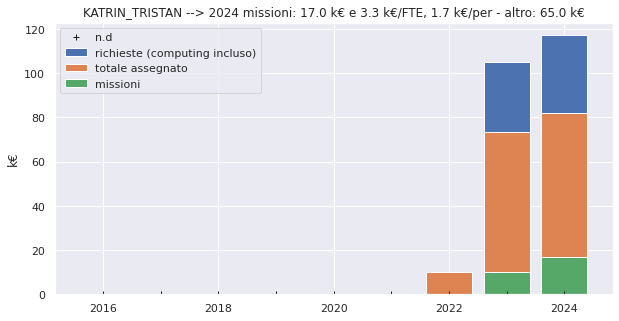

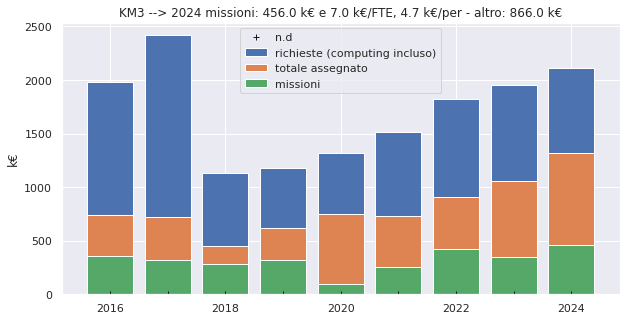

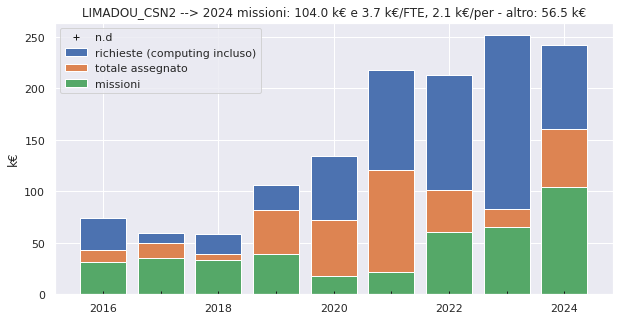

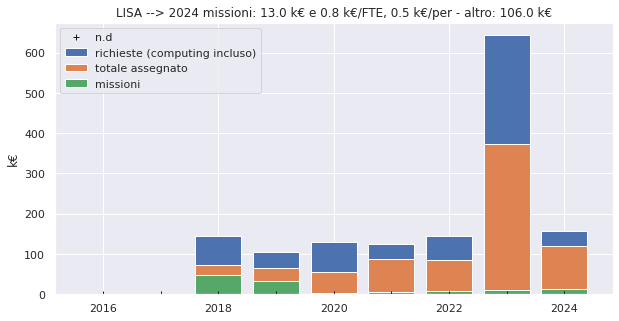

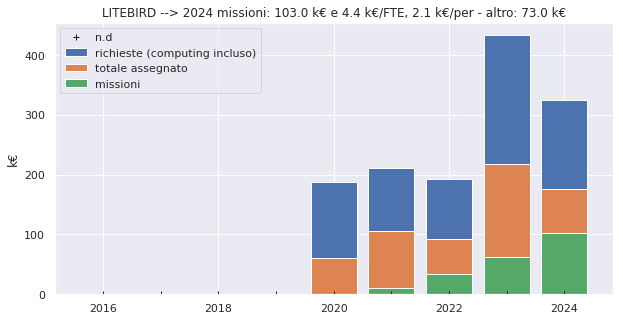

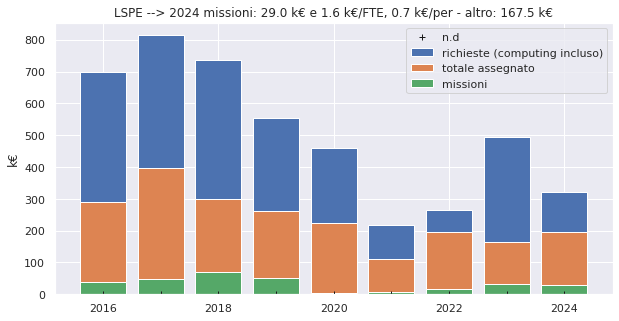

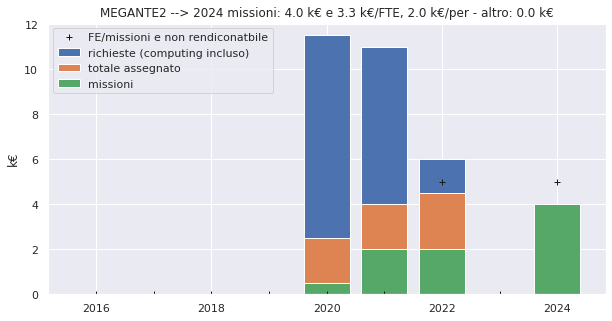

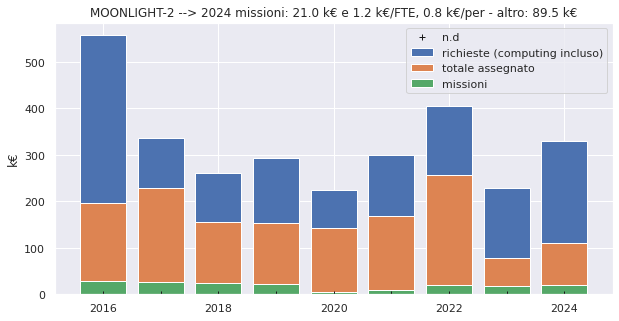

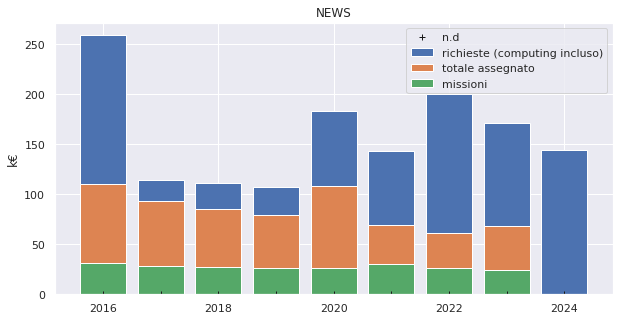

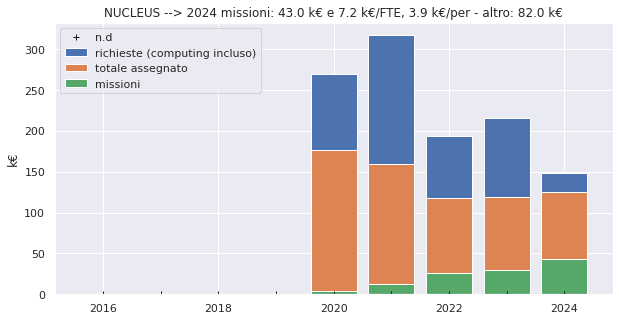

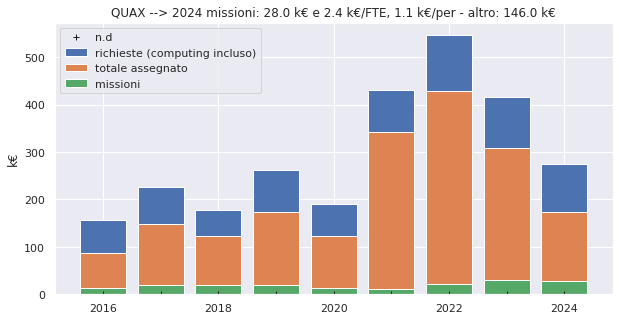

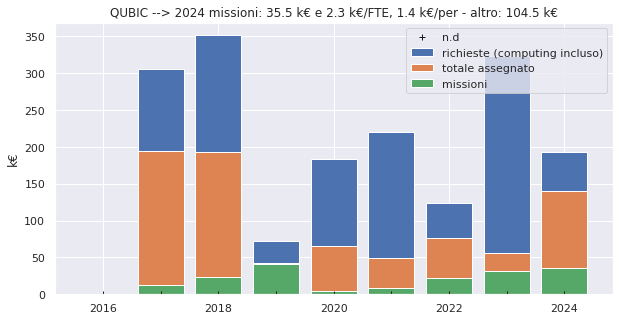

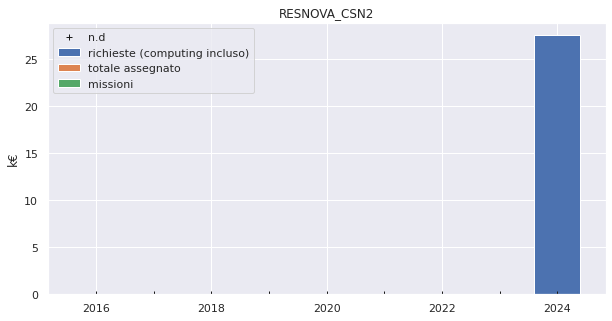

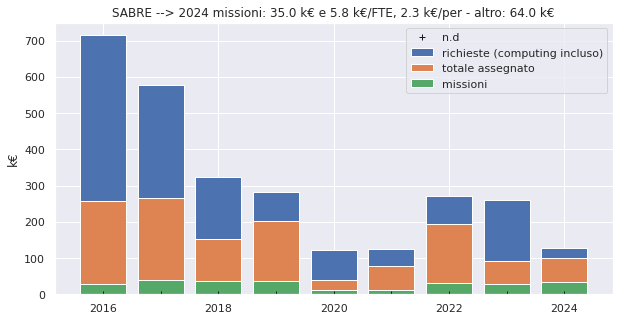

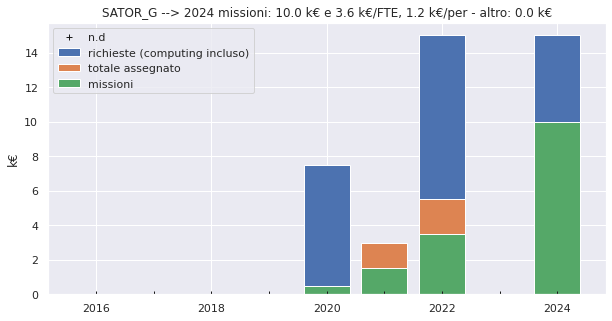

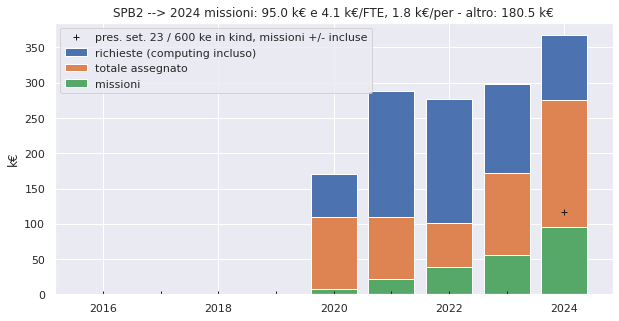

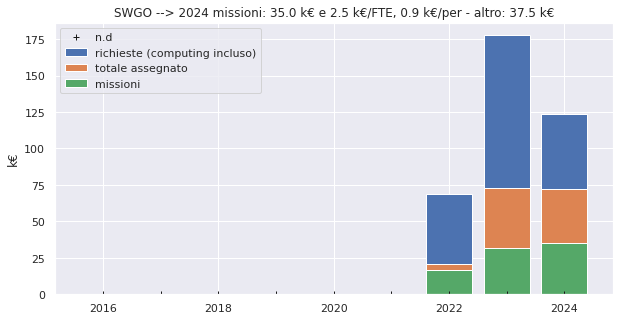

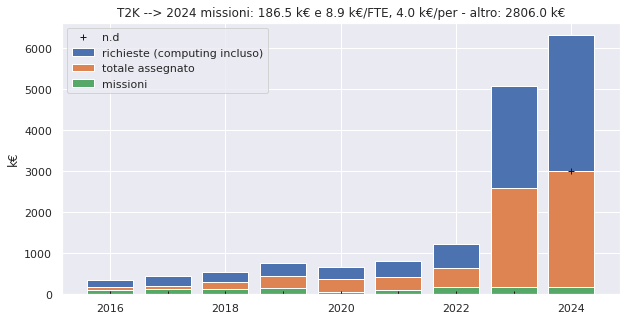

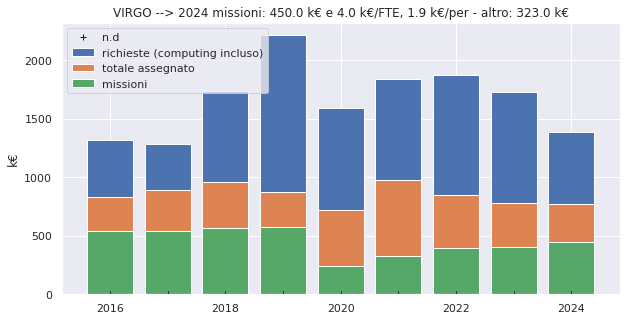

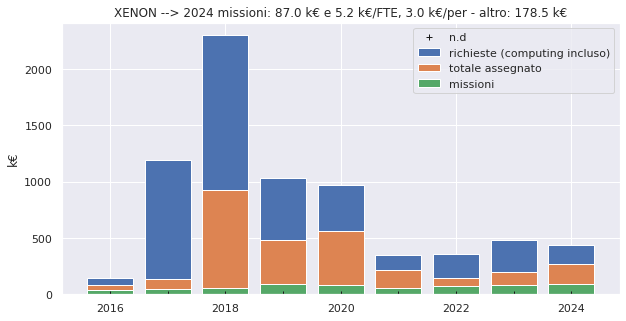

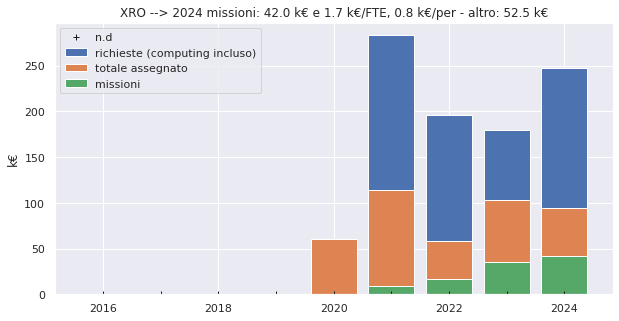

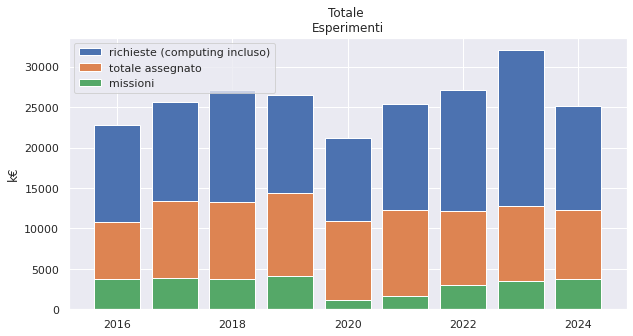

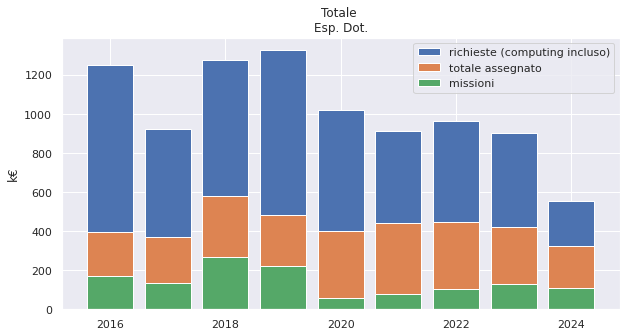

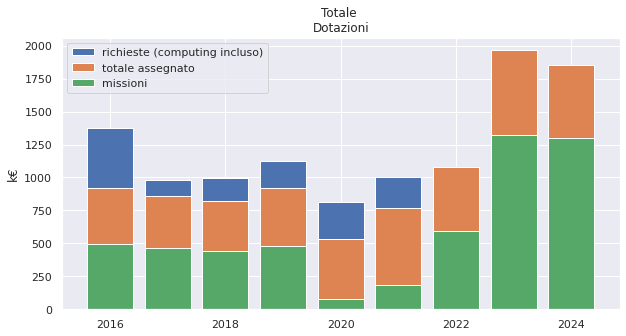

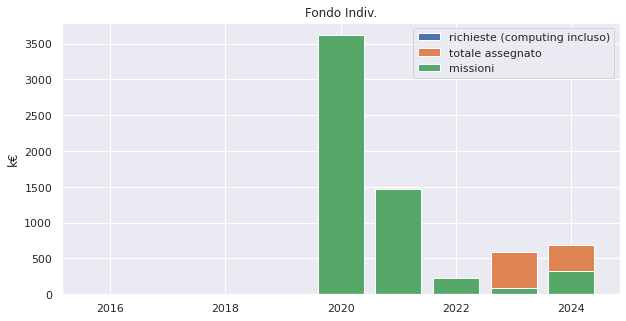

In [18]:
for i, cerca in enumerate(pd_anno[-1][1].esperimenti.values):
    if cerca:
        plot_exp(cerca, pd_anno, pd_fte, budget)

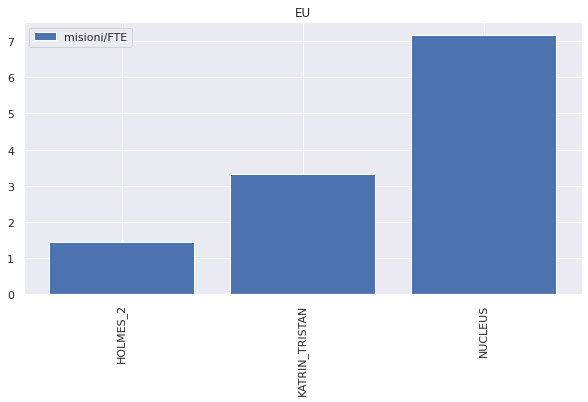

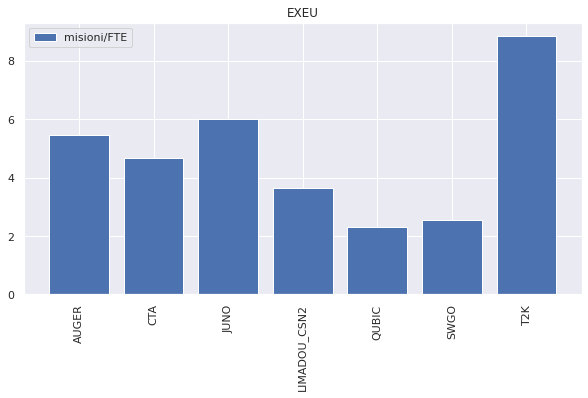

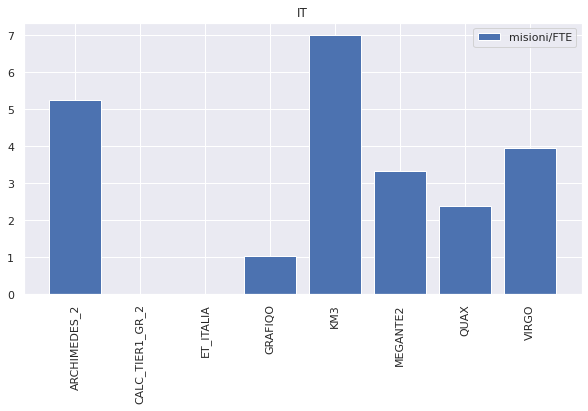

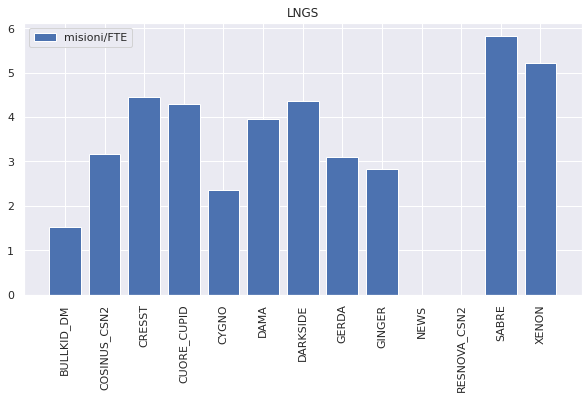

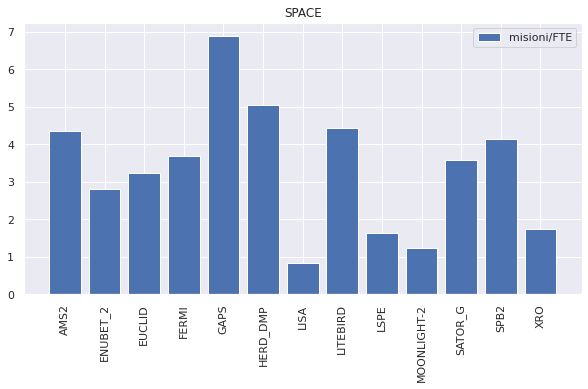

In [33]:
for i, sito in enumerate(np.unique(budget.sito.values)):
    plot_site(sito, pd_anno, pd_fte, budget)